# Gradient Boosting Classifier on HR Data 


In [1]:
#Importing Standard Libraries
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [3]:
#Setting Current working Directory 
os.chdir("/Users/alokkumar/Desktop/Python_For_ML")

In [10]:
#Read the Data Set HR data
hr_data = pd.read_csv("hr.csv")

In [11]:
# View the Data
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
#Sanity Check for Missing Data
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
#Checking the Datatypes of Columns
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [15]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [21]:
#Rename Columns Sales to Department
hr_data.rename(columns={'sales':'department'},inplace=True)

In [22]:
#Creating the predictor matrix 
X = hr_data.drop('left',axis = 1)
y = hr_data['left']

In [23]:
#Convert into dummy Variables
X = pd.get_dummies(X)

In [24]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
#Training and Testing data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 400,test_size = 0.20)

In [27]:
#Imporiting Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 60 , random_state = 400)

In [29]:
#Training the data
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
clf.score(X_test,y_test)

0.9726666666666667

In [32]:
# Using GridSearchCV for finding the Best estimartor for Gradient Boosting 
from sklearn.model_selection import GridSearchCV

In [33]:
mod = GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
#To check the best estimator
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
#keeping the best estimator as 160
clf = GradientBoostingClassifier(n_estimators = 160 , random_state = 400)

In [37]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
clf.score(X_test,y_test)

0.9743333333333334

In [39]:
#Checking the Feature importance
clf.feature_importances_

array([2.87450338e-01, 1.45559333e-01, 1.76146673e-01, 1.67553640e-01,
       1.48222357e-01, 1.50518546e-02, 3.89830799e-03, 3.18159390e-03,
       6.27434371e-03, 3.75992486e-03, 1.68631235e-03, 1.58785569e-03,
       0.00000000e+00, 5.42198140e-03, 8.46198616e-05, 4.54167051e-03,
       6.12695186e-03, 1.16284158e-02, 1.17731292e-02, 5.06965900e-05])

In [41]:
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending=False)

In [42]:
feature_imp

satisfaction_level        0.287450
number_project            0.176147
average_montly_hours      0.167554
time_spend_company        0.148222
last_evaluation           0.145559
Work_accident             0.015052
salary_low                0.011773
salary_high               0.011628
department_RandD          0.006274
department_technical      0.006127
department_product_mng    0.005422
department_support        0.004542
promotion_last_5years     0.003898
department_accounting     0.003760
department_IT             0.003182
department_hr             0.001686
department_management     0.001588
department_sales          0.000085
salary_medium             0.000051
department_marketing      0.000000
dtype: float64

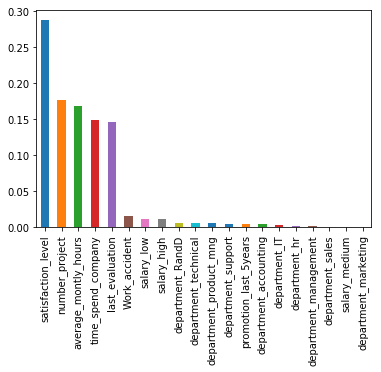

In [43]:
#Satisfaction level is the one of the strong reason to leave the company
feature_imp.plot(kind = 'bar')

In [44]:
# Creating the Partial Dependence plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

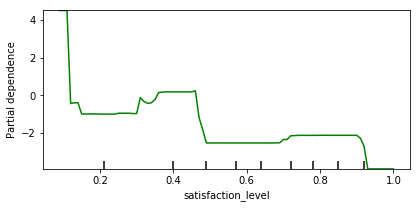

In [45]:
fig,axs = plot_partial_dependence(clf , X , [0],feature_names = X.columns.tolist())

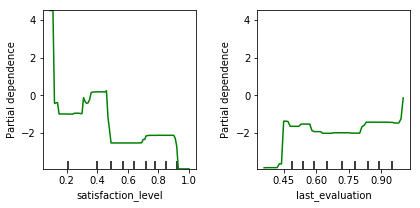

In [54]:
fig ,axs = plot_partial_dependence(clf,X,[0,1],feature_names=X.columns.tolist())